In [29]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
plt.style.use("/Users/tjwilli/presentation.mplstyle")

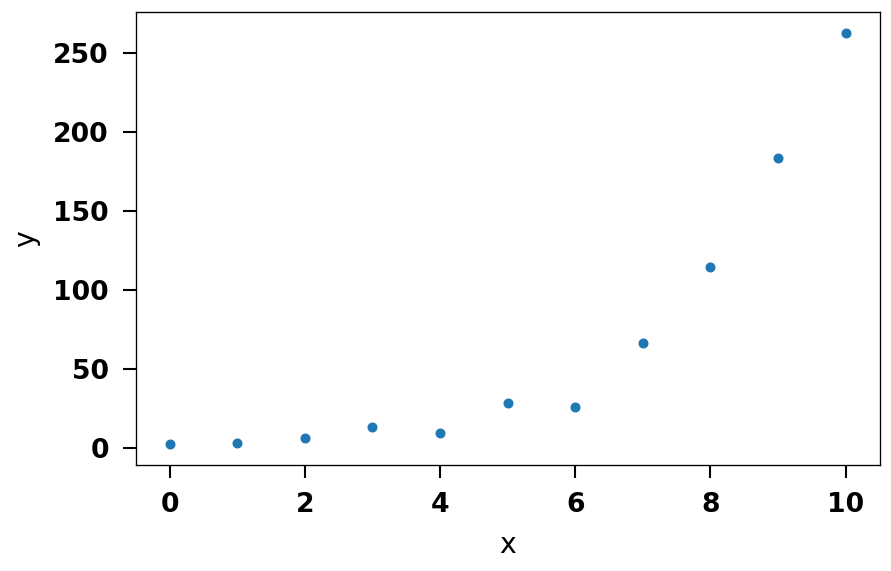

In [85]:
#x = np.linspace(0,10,11)
#y = 2*np.exp(x/2) * np.random.normal(1,0.20,size=x.size)
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("example_curve.pdf",bbox_inches='tight')

In [54]:
y

array([  2.4688354 ,   3.180003  ,   7.07722419,  12.75547868,
        15.77291645,  25.42238214,  35.18467746,  76.40660476,
       115.40395083, 238.67465498, 211.07714773])

In [60]:
def exp(x,a,b):
    return a * np.exp(b*x)

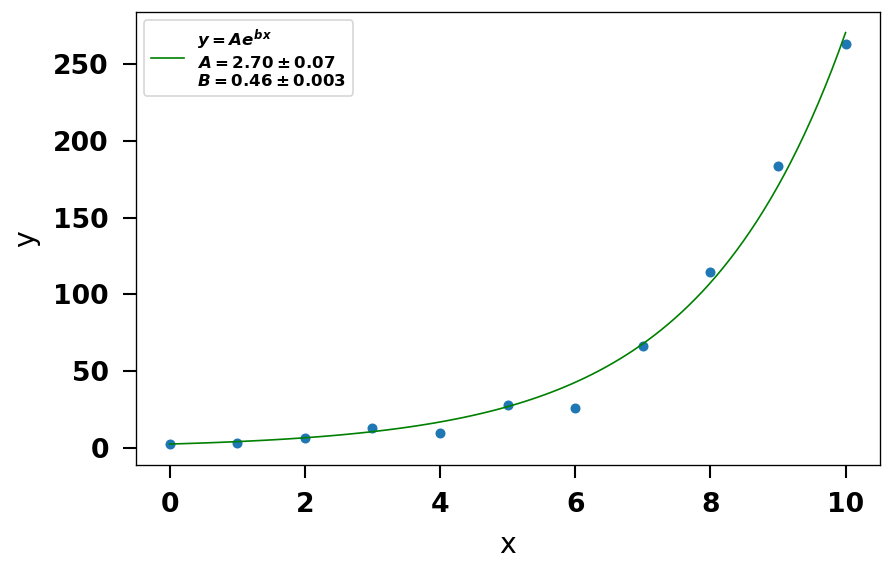

In [86]:
popt,pcov = opt.curve_fit(exp,x,y,p0=(2,.5),absolute_sigma=True)
siga,sigb = np.sqrt(np.diag(pcov))
plt.scatter(x,y)
xplt = np.linspace(x.min(),x.max(),100)
label = r'$y = Ae^{{bx}}$' + '\n' + r'$A={:.2f}\pm{:.2f}$'.format(popt[0],siga) + '\n' + r'$B={:.2f}\pm{:.3f}$'.format(popt[1],sigb)
plt.plot(xplt,exp(xplt,*popt),color='green',label=label)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("example_curve_fit.pdf",bbox_inches='tight')

In [89]:
np.round(y,2)

array([  2.47,   3.18,   6.31,  13.24,   9.92,  28.32,  25.93,  66.25,
       114.29, 183.55, 262.68])

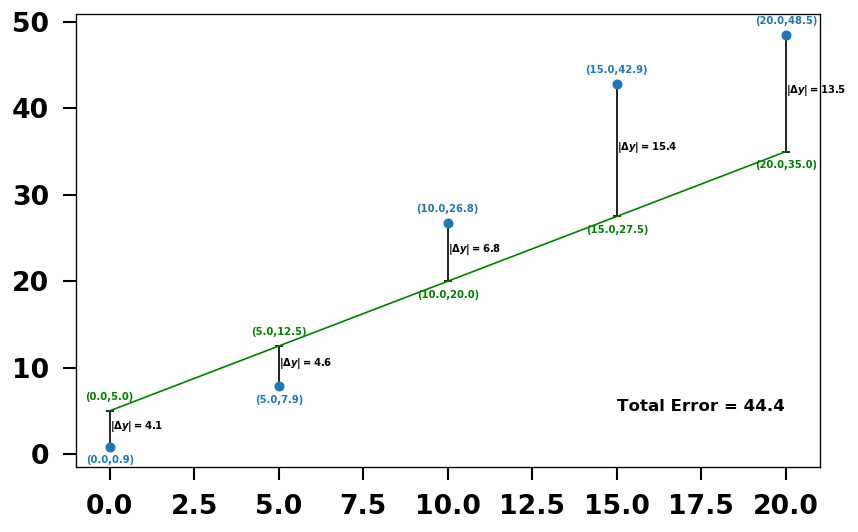

In [204]:
x = np.linspace(0,20,5)
ytrue = 2 * x + 1
ytrue = ytrue*np.random.normal(1,0.20,size=x.size)
xplot = np.linspace(x.min(),x.max(),100)
f = lambda x: 1.5 * x + 5
yplot = f(xplot)
plt.scatter(x,ytrue,zorder=101)
plt.plot(xplot,yplot,color='green')

toterr = 0
for i in range(x.size):
    plt.plot([x[i],x[i]],[ytrue[i],f(x[i])],c='k',marker='_',zorder=1)
    dy = np.abs(ytrue[i]-f(x[i]))
    toterr += dy
    if ytrue[i] > f(x[i]):
        plt.text(x[i],ytrue[i]+1,"({:.1f},{:.1f})".format(x[i],ytrue[i]),ha='center',va='bottom',fontsize=6,color='C0')
        plt.text(x[i],f(x[i])-1,"({:.1f},{:.1f})".format(x[i],f(x[i])),fontsize=6,color='green',ha='center',va='top')
        plt.text(x[i],f(x[i])+dy/2,r'$|\Delta y|={:.1f}$'.format(dy),fontsize=6)
    else:
        plt.text(x[i],ytrue[i]-1,"({:.1f},{:.1f})".format(x[i],ytrue[i]),ha='center',va='top',fontsize=6,color='C0')
        plt.text(x[i],f(x[i])+1,"({:.1f},{:.1f})".format(x[i],f(x[i])),fontsize=6,color='green',ha='center',va='bottom')
        plt.text(x[i],f(x[i])-dy/2,r'$|\Delta y|={:.1f}$'.format(dy),fontsize=6)
plt.text(15,5,"Total Error = {:.1f}".format(toterr))
#plt.savefig('resid_visual.pdf',bbox_inches='tight')

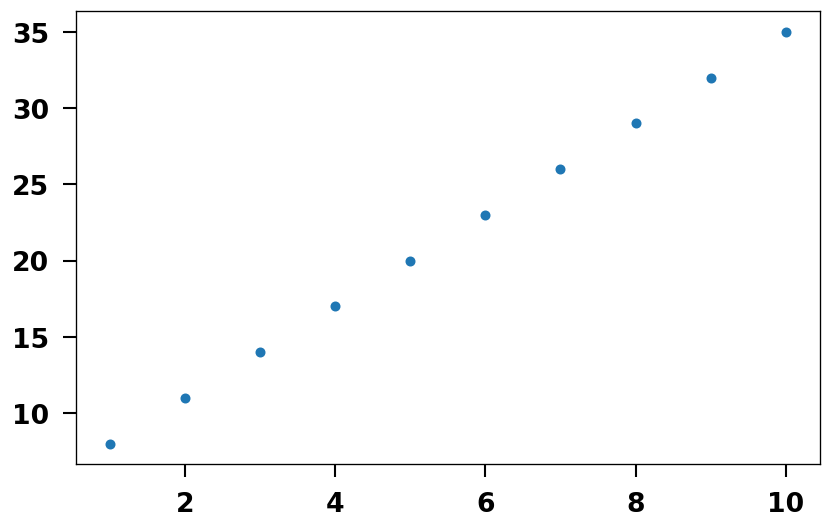

In [226]:
x = np.linspace(1,10,10)
ytrue = 3 * x + 5
ymeas = ytrue #* np.random.normal(1,0.1,size=x.size)
plt.scatter(x,ymeas)

In [227]:
#y = mx + b
xmean = x.mean()
ymean = ymeas.mean()
num = 0
denom = 0
for i in range(x.size):
    num += (x[i]-xmean) * (ymeas[i]-ymean)
    denom += (x[i]-xmean)**2
slope = num / denom

intercept = ymean - slope * xmean
print(slope,intercept)

3.0 5.0


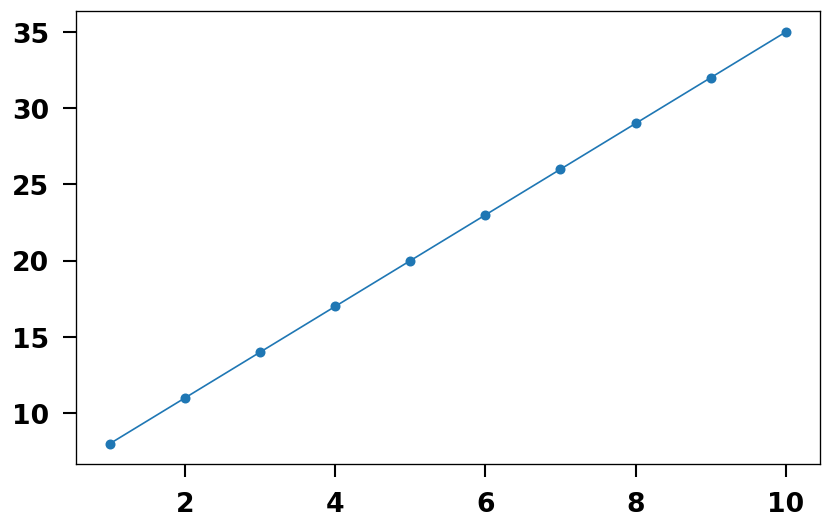

In [228]:
#Plot
xplot = np.linspace(x.min(),x.max(),100)
yplot = slope * xplot + intercept
plt.scatter(x,ymeas)
plt.plot(xplot,yplot)